# Research of apartment listings

We have at our disposal data from the Yandex Real Estate service - an archive of apartment listings for sale in St. Petersburg and neighboring cities for several years. We need to learn how to determine the market value of real estate objects. Our task is to set the parameters. This will allow us to build an automated system: it will track anomalies and fraudulent activity. 

For each apartment for sale, two types of data are available. The first is entered by the user, the second is obtained automatically on the basis of map data. For example, the distance to the center, airport, nearest park and water body. 

Workplan:
<br>1.Examine the general information from the dataframe.
<br>2.Find and study the missing values in the columns.
<br>3.Examine the data types in each column.
<br>4.Eliminate implicit duplicates.
<br>5.Find and handle anomalies.
<br>6.Add new columns to the table as needed for further investigation.
<br>7.Study the parameters of the objects.
<br>8.Study how fast the apartments were sold.
<br>9.Examine what factors most affect the total (full) value of an object.
<br>10.Identify the localities with the highest and lowest cost per square meter among the ten with the highest number of advertisements.
<br>11.Study how the cost of objects depends on the distance to the city center.



## Examining data from a file

In [1]:
#pip install nb_black

In [2]:
#%load_ext nb_black

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("/datasets/real_estate_data.csv", sep="\t")

In [5]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [7]:
df.shape

(23699, 22)

From the information obtained, it can be seen that the values in the columns `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` и `days_exposition` are missing.

Calculate the percentage of omissions in all columns of the dataframe.

In [9]:
(df.isna().mean() * 100).to_frame()

,0
total_images,0.000000
last_price,0.000000
total_area,0.000000
first_day_exposition,0.000000
rooms,0.000000
ceiling_height,38.799105
floors_total,0.362885
living_area,8.029875
floor,0.000000
is_apartment,88.290645


Build a histogram for all columns of the table in descending order of the number of omissions.

In [10]:
def pass_value_barh(df):
    (
        (df.isna().mean() * 100)
        .to_frame()
        .rename(columns={0: "space"})
        .query("space > 0")
        .sort_values(by="space", ascending=True)
        .plot(kind="barh", figsize=(19, 6), rot=-5, legend=False, fontsize=16)
        .set_title(
            "Гистограмма для столбцов таблицы" + "\n", fontsize=22, color="SteelBlue"
        )
    )

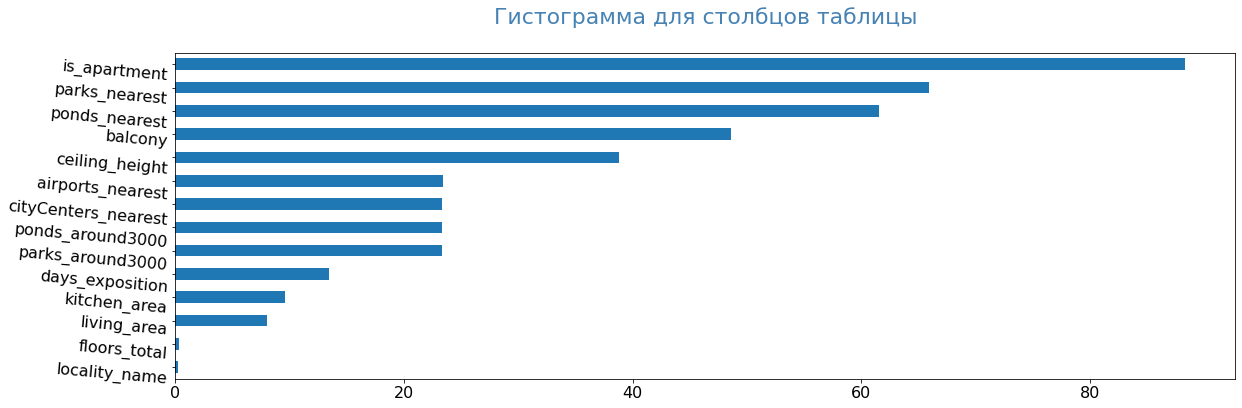

In [11]:
pass_value_barh(df)

## Data preprocessing

### Filling out omissions

Determine the type of missing values.

In [12]:
df[df["ceiling_height"].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,NaN,12.0,14.4,5,NaN,...,9.1,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0


In [13]:
df[df["floors_total"].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,NaN,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,NaN,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,NaN,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,NaN,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,NaN,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


In [14]:
df[df["locality_name"].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.8,2,NaN,...,8.8,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,NaN,4.0,42.6,2,NaN,...,18.6,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,NaN,24.0,15.6,3,NaN,...,10.7,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,NaN,24.0,33.1,21,NaN,...,8.2,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,NaN,5.0,30.8,5,NaN,...,6.5,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0


In [15]:
df[df["days_exposition"].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.6,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,...,7.0,NaN,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.1,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,...,8.3,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN


We see that the columns under consideration contain missing data of type `NaN`.

Count the number of omissions in these columns, calculate what fraction of missing values are in each of the columns with skips, and get the column distribution statistics.

In [16]:
df["floors_total"].isna().sum()

86

In [17]:
df["floors_total"].isna().mean()

0.0036288450989493226

In [18]:
df["floors_total"].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In this case we can't replace the missing values with median values as before, because we may have a situation when the value of the `floor` column is greater than the median value of `floors_total`, so we replace the missing values with the data from `floor`.

In [19]:
df.loc[df["floors_total"].isna(), "floors_total"] = df["floor"]

In [20]:
df["floors_total"].isna().sum()

0

The replacement of omissions in `floors_total` was successful.

In [21]:
df.loc[df["living_area"].isna() | df["kitchen_area"].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,NaN,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,NaN,...,NaN,NaN,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,NaN,9.0,NaN,4,NaN,...,NaN,NaN,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
df["living_area"].isna().sum()

1903

In [23]:
df["living_area"].isna().mean()

0.08029874678256467

In [24]:
df["living_area"].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [25]:
df["is_apartment"].isna().sum()

20924

In [26]:
df["is_apartment"].isna().mean()

0.8829064517490189

If the value in the `is_apartment` column is undefined, we will assume it is `False`.

In [27]:
df.loc[(df["is_apartment"].isna()), "is_apartment"] = False

In [28]:
df["is_apartment"].isna().sum()

0

The replacement has been completed successfully.

In [29]:
df["kitchen_area"].isna().sum()

2278

In [30]:
df["kitchen_area"].isna().mean()

0.09612219924891345

In [31]:
df["kitchen_area"].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [32]:
len(df.loc[(df["living_area"].isna()) & (df["kitchen_area"].isna())])

1464

In the rows where values are missing in `living_area` and `kitchen_area` columns at the same time, we put a value equal to 0.89 * `total_area` in `living_area` column and zero in `kitchen_area`. In this case we assume that we are considering a studio apartment, and we assume that 0.11 * `total_area` is the area of other rooms in the apartment (corridors, bathrooms, balconies).

In [33]:
len(df.loc[df["kitchen_area"] == 0.0])

0

In [34]:
df.loc[(df["living_area"].isna()) & (df["kitchen_area"].isna()), "kitchen_area"] = 0.0

In [35]:
len(df.loc[df["kitchen_area"] == 0.0])

1464

In [36]:
len(df.loc[(df["living_area"].isna()) & (df["kitchen_area"] == 0.0)])

1464

In [37]:
df.loc[(df["living_area"].isna()) & (df["kitchen_area"] == 0.0), "living_area"] = (
    0.89 * df["total_area"]
)

In [38]:
len(df.loc[(df["living_area"].isna()) & (df["kitchen_area"] == 0.0)])

0

In [39]:
df["living_area"].isna().sum()

439

In [40]:
df["kitchen_area"].isna().sum()

814

As we can see, there are not so many rows with missing values in the `kitchen_area` or `living_area` columns, and these omissions will not distort the results of future dataframe analysis, so we can leave them.

In [44]:
data = df.copy()
data[data['total_area']*0.9 <= (
    data ['living_area']+data ['kitchen_area'])][['total_area'
                                   ,'living_area','kitchen_area']]

,total_area,living_area,kitchen_area
41,74.0,59.0,12.0
171,49.0,38.0,10.0
184,30.2,26.1,6.2
220,37.0,28.0,9.0
319,59.7,47.4,6.4
...,...,...,...
23216,114.0,90.2,16.0
23297,48.2,42.2,6.0
23328,54.0,40.0,10.0
23521,65.0,44.0,15.3


As we can see, there are still lines in our dataframe where: total_area*0.9 <= (living_area + kitchen_area). There are not many of them, so we can ignore them in the further analysis.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23699 non-null  float64
 7   living_area           23260 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          22885 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [46]:
df["balcony"].isna().sum()

11519

In [47]:
df["balcony"].isna().mean()

0.4860542638929913

In [48]:
df["balcony"].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

Assume that if the value of the balcony is undefined, the apartment simply does not have one.

In [49]:
df.loc[(df["balcony"].isna()), "balcony"] = 0

In [50]:
df["balcony"].isna().sum()

0

The replacement has been completed successfully.

In [51]:
df["locality_name"].isna().sum()

49

In [52]:
df["locality_name"].isna().mean()

0.002067597788936242

Omissions in the `locality_name` column are extremely rare, so we can remove rows with undefined location.

In [53]:
df = df.loc[~df["locality_name"].isna()]

In [54]:
df["locality_name"].isna().sum()

0

The removal was successful.

In [55]:
df["airports_nearest"].isna().sum()

5534

In [56]:
df["airports_nearest"].isna().mean()

0.23399577167019028

In [57]:
df["airports_nearest"].describe()

count    18116.000000
mean     28803.225878
std      12637.314144
min          0.000000
25%      18575.750000
50%      26756.500000
75%      37294.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [58]:
df["cityCenters_nearest"].isna().sum()

5511

In [59]:
df["cityCenters_nearest"].isna().mean()

0.2330232558139535

In [60]:
df["cityCenters_nearest"].describe()

count    18139.000000
mean     14197.860742
std       8606.830295
min        181.000000
25%       9241.000000
50%      13105.000000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [61]:
df["parks_around3000"].isna().sum()

5510

In [62]:
df["parks_around3000"].isna().mean()

0.23298097251585623

In [63]:
df["parks_around3000"].describe()

count    18140.000000
mean         0.611577
std          0.802003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [64]:
df["parks_nearest"].isna().sum()

15586

In [65]:
df["parks_nearest"].isna().mean()

0.6590274841437632

In [66]:
df["parks_nearest"].describe()

count    8064.000000
mean      490.830729
std       342.554386
min         1.000000
25%       288.000000
50%       454.500000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [67]:
df["ponds_around3000"].isna().sum()

5510

In [68]:
df["ponds_around3000"].isna().mean()

0.23298097251585623

In [69]:
df["ponds_around3000"].describe()

count    18140.000000
mean         0.769680
std          0.937948
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [70]:
df["ponds_nearest"].isna().sum()

14565

In [71]:
df["ponds_nearest"].isna().mean()

0.6158562367864694

In [72]:
df["ponds_nearest"].describe()

count    9085.000000
mean      518.059879
std       277.841733
min        13.000000
25%       293.000000
50%       502.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In the `airports_nearest`, `cityCenters_nearest`, `parks_nearest`, and `ponds_nearest` columns, which describe quantitative variables, we replace omissions with median values because they are the least sensitive to outliers in the data.

In [73]:
airports_nearest_median = df["airports_nearest"].median()

In [74]:
airports_nearest_median

26756.5

In [75]:
df.loc[df["airports_nearest"].isna(), "airports_nearest"] = airports_nearest_median

In [76]:
df["airports_nearest"].isna().sum()

0

Explore the distribution of skips in the `cityCenters_nearest` column by city.

In [77]:
df.loc[df["cityCenters_nearest"].isna()].groupby("locality_name")["locality_name"].agg(
    ["count"]
).sort_values("count", ascending=False).query('locality_name=="Санкт-Петербург"')

,count
locality_name,
Санкт-Петербург,61


In [78]:
df.loc[df["cityCenters_nearest"].isna()].groupby("locality_name")["locality_name"].agg(
    ["count"]
).sort_values("count", ascending=False)

,count
locality_name,
посёлок Мурино,522
Всеволожск,398
Гатчина,307
деревня Кудрово,299
Выборг,237
...,...
поселок городского типа Большая Ижора,1
поселок Цвылёво,1
деревня Трубников Бор,1


Since for further analysis we need information about the distance to the center only for St. Petersburg, let's fill in the omissions in the `cityCenters_nearest` column only for it.

In [79]:
cityCenters_nearest_median = df.query('locality_name=="Санкт-Петербург"')[
    "cityCenters_nearest"
].median()

In [80]:
cityCenters_nearest_median

12244.5

In [81]:
df[
    (df["locality_name"] == "Санкт-Петербург") & (df["cityCenters_nearest"].isna())
] = cityCenters_nearest_median

In [82]:
df[(df["locality_name"] == "Санкт-Петербург") & (df["cityCenters_nearest"].isna())][
    "cityCenters_nearest"
].count()

0

In [83]:
df["ceiling_height"].isna().sum()

9130

In [84]:
df["ceiling_height"].isna().mean()

0.386046511627907

In [85]:
df["ceiling_height"].describe()

count    14520.000000
mean        54.199590
std        791.818606
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max      12244.500000
Name: ceiling_height, dtype: float64

Since the `ceiling_height` column describes a quantitative value, we can replace the omissions in it with the median value. At the same time, it is worth considering the neighborhood of ceiling height, since in modern districts of St. Petersburg ceiling heights are expected to be lower than in historical ones, and we will see that filling such a volume of omissions with the median or average value of the total sample will "smudge" this distinctive feature of properties in the center of St. Petersburg.

Add `center_distance_km` column to the table, which will store the distance to the center in kilometers.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  float64
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  float64
 5   ceiling_height        14520 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23214 non-null  float64
 8   floor                 23650 non-null  float64
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  object 
 11  open_plan             23650 non-null  object 
 12  kitchen_area          22843 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [87]:
df.query('locality_name=="Санкт-Петербург"')["cityCenters_nearest"].isna().sum()

0

In [88]:
def get_km(row):
    if row["locality_name"] == "Санкт-Петербург":
        return round(row["cityCenters_nearest"] / 1000)
    else:
        return 0.0

In [89]:
df["center_distance_km"] = df.apply(get_km, axis=1)

In [90]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km
0,20.0,13000000.0,108.00,2019-03-07T00:00:00,3.0,2.70,16.0,51.00,8.0,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16.0
1,7.0,3350000.0,40.40,2018-12-04T00:00:00,1.0,NaN,11.0,18.60,1.0,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.0
2,10.0,5196000.0,56.00,2015-08-20T00:00:00,2.0,NaN,5.0,34.30,4.0,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,14.0
3,0.0,64900000.0,159.00,2015-07-24T00:00:00,3.0,NaN,14.0,141.51,9.0,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7.0
4,2.0,10000000.0,100.00,2018-06-19T00:00:00,2.0,3.03,14.0,32.00,13.0,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,8.0
5,10.0,2890000.0,30.40,2018-09-10T00:00:00,1.0,NaN,12.0,14.40,5.0,False,...,0.0,городской посёлок Янино-1,26756.5,NaN,NaN,NaN,NaN,NaN,55.0,0.0
6,6.0,3700000.0,37.30,2017-11-02T00:00:00,1.0,NaN,26.0,10.60,6.0,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0.0
7,5.0,7915000.0,71.60,2019-04-18T00:00:00,2.0,NaN,24.0,NaN,22.0,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,12.0
8,20.0,2900000.0,33.16,2018-05-23T00:00:00,1.0,NaN,27.0,15.43,26.0,False,...,0.0,посёлок Мурино,26756.5,NaN,NaN,NaN,NaN,NaN,189.0,0.0
9,18.0,5400000.0,61.00,2017-02-26T00:00:00,3.0,2.50,9.0,43.60,7.0,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,15.0


In [91]:
df["center_distance_km"] = df["center_distance_km"].astype("int")

In [92]:
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km
0,20.0,13000000.0,108.00,2019-03-07T00:00:00,3.0,2.70,16.0,51.00,8.0,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16
1,7.0,3350000.0,40.40,2018-12-04T00:00:00,1.0,NaN,11.0,18.60,1.0,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0
2,10.0,5196000.0,56.00,2015-08-20T00:00:00,2.0,NaN,5.0,34.30,4.0,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,14
3,0.0,64900000.0,159.00,2015-07-24T00:00:00,3.0,NaN,14.0,141.51,9.0,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7
4,2.0,10000000.0,100.00,2018-06-19T00:00:00,2.0,3.03,14.0,32.00,13.0,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,8
5,10.0,2890000.0,30.40,2018-09-10T00:00:00,1.0,NaN,12.0,14.40,5.0,False,...,0.0,городской посёлок Янино-1,26756.5,NaN,NaN,NaN,NaN,NaN,55.0,0
6,6.0,3700000.0,37.30,2017-11-02T00:00:00,1.0,NaN,26.0,10.60,6.0,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0
7,5.0,7915000.0,71.60,2019-04-18T00:00:00,2.0,NaN,24.0,NaN,22.0,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,12
8,20.0,2900000.0,33.16,2018-05-23T00:00:00,1.0,NaN,27.0,15.43,26.0,False,...,0.0,посёлок Мурино,26756.5,NaN,NaN,NaN,NaN,NaN,189.0,0
9,18.0,5400000.0,61.00,2017-02-26T00:00:00,3.0,2.50,9.0,43.60,7.0,False,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,15


<AxesSubplot:xlabel='center_distance_km'>

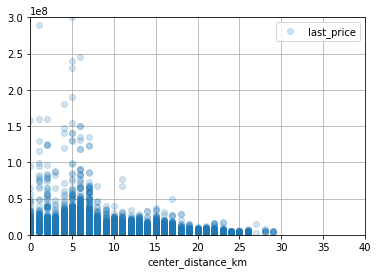

In [93]:
df.plot(
    x="center_distance_km",
    y="last_price",
    style="o",
    grid=True,
    alpha=0.2,
    ylim=(0, 3 * 100000000),
    xlim=(0, 40),
)

According to the jump in apartment prices, we can conclude that the central zone ends at a distance of about 6.5 km from the center.

In [94]:
ceiling_height_median_centre = df.query("center_distance_km<=6.5")[
    "ceiling_height"
].median()

In [95]:
ceiling_height_median_centre

2.7

In [96]:
ceiling_height_median_not_centre = df.query("center_distance_km>6.5")[
    "ceiling_height"
].median()

In [97]:
ceiling_height_median_not_centre

2.61

Replace the omissions in the `ceiling_height` column with the median value.

In [98]:
df.loc[
    (df["center_distance_km"] <= 6.5) & (df["ceiling_height"].isna()), "ceiling_height"
] = ceiling_height_median_centre

In [99]:
df.loc[
    (df["center_distance_km"] > 6.5) & (df["ceiling_height"].isna()), "ceiling_height"
] = ceiling_height_median_not_centre

In [100]:
df["ceiling_height"].isna().sum()

0

In [101]:
df.query("ceiling_height==@ceiling_height_median_centre").head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km
0,20.0,13000000.0,108.00,2019-03-07T00:00:00,3.0,2.7,16.0,51.00,8.0,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16
1,7.0,3350000.0,40.40,2018-12-04T00:00:00,1.0,2.7,11.0,18.60,1.0,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0
5,10.0,2890000.0,30.40,2018-09-10T00:00:00,1.0,2.7,12.0,14.40,5.0,False,...,0.0,городской посёлок Янино-1,26756.5,NaN,NaN,NaN,NaN,NaN,55.0,0
6,6.0,3700000.0,37.30,2017-11-02T00:00:00,1.0,2.7,26.0,10.60,6.0,False,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,0
8,20.0,2900000.0,33.16,2018-05-23T00:00:00,1.0,2.7,27.0,15.43,26.0,False,...,0.0,посёлок Мурино,26756.5,NaN,NaN,NaN,NaN,NaN,189.0,0
11,9.0,3300000.0,44.00,2018-08-27T00:00:00,2.0,2.7,5.0,31.00,4.0,False,...,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0,0
12,10.0,3890000.0,54.00,2016-06-30T00:00:00,2.0,2.7,5.0,30.00,5.0,False,...,0.0,Сертолово,26756.5,NaN,NaN,NaN,NaN,NaN,90.0,0
14,1.0,4400000.0,36.00,2016-06-23T00:00:00,1.0,2.7,6.0,17.00,1.0,False,...,0.0,Пушкин,20782.0,30759.0,0.0,NaN,1.0,96.0,203.0,0
20,12.0,6120000.0,80.00,2017-09-28T00:00:00,3.0,2.7,27.0,48.00,11.0,False,...,2.0,посёлок Парголово,53134.0,19311.0,0.0,NaN,0.0,NaN,74.0,0
24,8.0,6500000.0,97.20,2015-10-31T00:00:00,2.0,2.7,3.0,46.50,1.0,False,...,0.0,Санкт-Петербург,20052.0,2336.0,3.0,411.0,3.0,124.0,265.0,2


In [102]:
df.query("ceiling_height==@ceiling_height_median_not_centre").head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km
2,10.0,5196000.0,56.0,2015-08-20T00:00:00,2.0,2.61,5.0,34.30,4.0,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,14
3,0.0,64900000.0,159.0,2015-07-24T00:00:00,3.0,2.61,14.0,141.51,9.0,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7
7,5.0,7915000.0,71.6,2019-04-18T00:00:00,2.0,2.61,24.0,NaN,22.0,False,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,12
15,16.0,4650000.0,39.0,2017-11-18T00:00:00,1.0,2.61,14.0,20.50,5.0,False,...,1.0,Санкт-Петербург,12900.0,14259.0,1.0,590.0,1.0,296.0,19.0,14
17,6.0,4180000.0,36.0,2016-09-09T00:00:00,1.0,2.61,17.0,16.50,7.0,False,...,1.0,Санкт-Петербург,33564.0,14616.0,0.0,NaN,1.0,859.0,571.0,15
21,13.0,3200000.0,31.6,2018-03-14T00:00:00,1.0,2.61,5.0,16.90,2.0,False,...,1.0,Санкт-Петербург,36064.0,9722.0,1.0,248.0,0.0,NaN,310.0,10
26,6.0,4050000.0,60.0,2017-04-28T00:00:00,4.0,2.61,5.0,43.00,4.0,False,...,0.0,Санкт-Петербург,11580.0,10510.0,0.0,NaN,1.0,95.0,265.0,11
29,9.0,8600000.0,100.0,2016-04-09T00:00:00,3.0,2.61,19.0,52.00,15.0,False,...,0.0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0,12
32,7.0,4990000.0,60.0,2016-05-22T00:00:00,3.0,2.61,5.0,39.00,4.0,False,...,0.0,Санкт-Петербург,11349.0,12889.0,0.0,NaN,1.0,426.0,224.0,13
36,13.0,3790000.0,45.0,2017-01-25T00:00:00,2.0,2.61,9.0,27.00,9.0,False,...,2.0,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0,16


As we can see, the replacement of strings with missing values with median values has been successful.

In [103]:
parks_nearest_median = df["parks_nearest"].median()

In [104]:
parks_nearest_median

456.0

In [105]:
df.loc[df["parks_nearest"].isna(), "parks_nearest"] = parks_nearest_median

In [106]:
df["parks_nearest"].isna().sum()

0

In [107]:
ponds_nearest_median = df["ponds_nearest"].median()

In [108]:
ponds_nearest_median

504.0

In [109]:
df.loc[df["ponds_nearest"].isna(), "ponds_nearest"] = ponds_nearest_median

In [110]:
df["ponds_nearest"].isna().sum()

0

The omissions in the `days_exposition` column tell us that the apartments are not sold yet, so we'll leave them.

In [111]:
df["ponds_around3000"].describe()

count    18201.000000
mean        41.804104
std        707.643262
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max      12244.500000
Name: ponds_around3000, dtype: float64

In [112]:
df["parks_around3000"].describe()

count    18201.000000
mean        41.646530
std        707.652233
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max      12244.500000
Name: parks_around3000, dtype: float64

We see that the medians in columns `ponds_around3000` and `parks_around3000` take integer values, so we can replace omissions with them.

In [113]:
df.loc[df["ponds_around3000"].isna(), "ponds_around3000"] = df[
    "ponds_around3000"
].median()

In [114]:
df.loc[df["parks_around3000"].isna(), "parks_around3000"] = df[
    "parks_around3000"
].median()

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  float64
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  float64
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  float64
 7   living_area           23214 non-null  float64
 8   floor                 23650 non-null  float64
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  object 
 11  open_plan             23650 non-null  object 
 12  kitchen_area          22843 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

All omissions in the dataframe have been processed.

### Checking data for anomalies and corrections

In [116]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km
0,20.0,13000000.0,108.0,2019-03-07T00:00:00,3.0,2.70,16.0,51.00,8.0,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16
1,7.0,3350000.0,40.4,2018-12-04T00:00:00,1.0,2.70,11.0,18.60,1.0,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,456.0,0.0,504.0,81.0,0
2,10.0,5196000.0,56.0,2015-08-20T00:00:00,2.0,2.61,5.0,34.30,4.0,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,14
3,0.0,64900000.0,159.0,2015-07-24T00:00:00,3.0,2.61,14.0,141.51,9.0,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7
4,2.0,10000000.0,100.0,2018-06-19T00:00:00,2.0,3.03,14.0,32.00,13.0,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,8


In [117]:
df.select_dtypes(exclude="object")[df.select_dtypes(exclude="object") < 0].count()

total_images           0
last_price             0
total_area             0
rooms                  0
ceiling_height         0
floors_total           0
living_area            0
floor                  0
kitchen_area           0
balcony                0
airports_nearest       0
cityCenters_nearest    0
parks_around3000       0
parks_nearest          0
ponds_around3000       0
ponds_nearest          0
days_exposition        0
center_distance_km     0
dtype: int64

We see that there are no negative values in df.

In [118]:
df.select_dtypes(exclude="object")[df.select_dtypes(exclude="object") == 0].count()

total_images            1058
last_price                 0
total_area                 0
rooms                    197
ceiling_height             0
floors_total               0
living_area                0
floor                      0
kitchen_area            1446
balcony                15195
airports_nearest           1
cityCenters_nearest        0
parks_around3000       15529
parks_nearest              0
ponds_around3000        9055
ponds_nearest              0
days_exposition            0
center_distance_km      8017
dtype: int64

It can be seen that the `rooms` column contains zero values, although any apartment must consist of at least one room, hence this is an anomaly.

In [119]:
df.loc[df["rooms"] == 0]["rooms"].count() / len(df["rooms"])

0.008329809725158562

We have found out that the fraction of null values in the `rooms` column is extremely small, so we can delete the corresponding rows.

In [120]:
df = df.loc[df["rooms"] != 0]

In [121]:
df[df["rooms"] == 0]["rooms"].count()

0

Also the `airports_nearest` column has one null anomalous value, let's remove it.

In [122]:
df = df.loc[df["airports_nearest"] != 0]

In [123]:
df[df["airports_nearest"] == 0]["airports_nearest"].count()

0

Check that there are only two values in the boolean type columns.

In [124]:
df["is_apartment"].value_counts()

False      23341
12244.5       61
True          50
Name: is_apartment, dtype: int64

In [125]:
df["open_plan"].value_counts()

False      23383
12244.5       61
True           8
Name: open_plan, dtype: int64

In [126]:
df["studio"].value_counts()

False      23380
12244.5       61
True          11
Name: studio, dtype: int64

No anomalies were detected in the boolean type columns.

Check the `ceiling_height` column for anomalies.

In [127]:
df.sort_values("ceiling_height")["ceiling_height"]

22590        1.00
5712         1.20
16934        1.75
552          2.00
5850         2.00
           ...   
15161    12244.50
11796    12244.50
10879    12244.50
19861    12244.50
2707     12244.50
Name: ceiling_height, Length: 23452, dtype: float64

In [128]:
df1 = df.loc[(df["ceiling_height"] >= 2.5) & (df["ceiling_height"] <= 4.0)]

In [129]:
df1.shape[0]

23245

In [130]:
df.shape[0]

23452

In [131]:
1 - df1.shape[0] / df.shape[0]

0.008826539314344184

As we can see, there are anomalous values in `ceiling_height`, but they are few, so we can delete the lines with them.

In [132]:
df = df.loc[(df["ceiling_height"] >= 2.5) & (df["ceiling_height"] <= 4.0)]

In [133]:
df["ceiling_height"].unique()

array([2.7 , 2.61, 3.03, 2.5 , 2.67, 2.56, 3.05, 2.75, 2.6 , 2.9 , 2.8 ,
       2.55, 3.  , 2.65, 3.2 , 3.25, 3.45, 2.77, 2.85, 2.64, 2.57, 3.5 ,
       3.3 , 2.71, 4.  , 2.73, 2.84, 3.1 , 3.4 , 3.06, 2.72, 2.54, 2.51,
       2.78, 2.76, 2.58, 3.7 , 2.52, 2.87, 2.66, 2.59, 3.6 , 2.92, 3.11,
       3.13, 3.8 , 3.15, 3.55, 3.16, 3.62, 3.12, 2.53, 2.74, 2.96, 2.79,
       2.95, 2.94, 3.82, 3.54, 3.53, 2.83, 3.38, 3.01, 3.65, 3.9 , 3.18,
       3.35, 3.57, 2.62, 2.82, 3.98, 2.63, 3.83, 3.52, 3.95, 3.75, 2.88,
       3.67, 3.87, 3.66, 3.85, 3.86, 3.24, 3.36, 3.08, 3.68, 3.07, 3.37,
       3.09, 3.26, 3.34, 2.81, 3.44, 2.97, 3.14, 2.68, 3.22, 3.27, 2.93,
       3.46, 3.47, 3.33, 3.63, 3.32, 2.98, 2.86, 3.17, 3.28, 3.04, 3.84,
       3.23, 3.02, 3.21, 3.43, 3.78, 3.39, 2.69, 3.31, 3.56, 3.51, 3.93,
       3.42, 2.99, 3.49, 2.91, 3.88, 3.29, 3.76, 3.69, 2.89, 3.58, 3.48,
       3.59])

Find and eliminate rare and outlier values.

In [134]:
(
    df[
        [
            "rooms",
            "total_area",
            "ceiling_height",
            "days_exposition",
            "last_price",
            "living_area",
            "kitchen_area",
            "floor",
            "floors_total",
        ]
    ]
    .apply(["count", "min", "max"])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,245.00","23,245.00","23,245.00","20,139.00","23,245.00","22,810.00","22,628.00","23,245.00","23,245.00"
min,1.00,12.00,2.50,1.00,"12,190.00",2.00,0.00,1.00,1.00
max,19.00,900.00,4.00,"1,580.00","763,000,000.00",445.00,112.00,33.00,60.00


In [135]:
df.rooms.value_counts().to_frame()

,rooms
1.0,7977
2.0,7853
3.0,5745
4.0,1167
5.0,316
6.0,101
7.0,55
8.0,12
9.0,8
10.0,3


We see that in our dataframe there are rare apartments with a large number of rooms (more than 7), which are out of the total sample. Let's remove them.

In [136]:
df = df[df["rooms"] < 8]

In [137]:
df.rooms.value_counts().to_frame()

,rooms
1.0,7977
2.0,7853
3.0,5745
4.0,1167
5.0,316
6.0,101
7.0,55


In [138]:
df.floors_total.value_counts().to_frame()

,floors_total
5.0,5694
9.0,3726
16.0,1350
12.0,1350
4.0,1181
10.0,1161
25.0,1043
6.0,893
17.0,814
3.0,653


Remove the knockout values in the `floors_total` column (greater than 30).

In [139]:
df = df[df["floors_total"] < 31]

In [140]:
df.floors_total.value_counts().to_frame()

,floors_total
5.0,5694
9.0,3726
16.0,1350
12.0,1350
4.0,1181
10.0,1161
25.0,1043
6.0,893
17.0,814
3.0,653


In [141]:
df.floor.value_counts().to_frame()

,floor
2.0,3287
3.0,3017
1.0,2867
4.0,2759
5.0,2568
6.0,1273
7.0,1179
8.0,1067
9.0,1030
10.0,677


In [142]:
df.sort_values("total_area", ascending=False)["total_area"]

12859    631.2
3117     631.0
15651    618.0
4237     517.0
15016    500.0
         ...  
19558     13.2
19807     13.0
19546     13.0
17961     13.0
19904     12.0
Name: total_area, Length: 23186, dtype: float64

Remove rows with area greater than 200 and less than 9 square meters, since rows with these values are anomalies in our table.

In [143]:
df = df[(df["total_area"] < 200) & (df["total_area"] > 9)]

In [144]:
df.sort_values("total_area", ascending=False)["total_area"]

15079    199.2
6509     198.9
16656    198.1
10315    198.0
11438    198.0
         ...  
19558     13.2
19546     13.0
19807     13.0
17961     13.0
19904     12.0
Name: total_area, Length: 22997, dtype: float64

In [145]:
df.sort_values("living_area", ascending=False)["living_area"]

15079    177.288
2709     175.330
2756     174.440
7131     174.440
18320    167.320
          ...   
23534        NaN
23584        NaN
23587        NaN
23588        NaN
23697        NaN
Name: living_area, Length: 22997, dtype: float64

Remove rows with less than 9 square meters.

In [146]:
df.sort_values("living_area", ascending=False)["living_area"].tail(20)

22834   NaN
22839   NaN
22912   NaN
22923   NaN
23018   NaN
23060   NaN
23079   NaN
23106   NaN
23228   NaN
23238   NaN
23292   NaN
23324   NaN
23326   NaN
23423   NaN
23426   NaN
23534   NaN
23584   NaN
23587   NaN
23588   NaN
23697   NaN
Name: living_area, dtype: float64

In [147]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22997 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          22997 non-null  float64
 1   last_price            22997 non-null  float64
 2   total_area            22997 non-null  float64
 3   first_day_exposition  22997 non-null  object 
 4   rooms                 22997 non-null  float64
 5   ceiling_height        22997 non-null  float64
 6   floors_total          22997 non-null  float64
 7   living_area           22571 non-null  float64
 8   floor                 22997 non-null  float64
 9   is_apartment          22997 non-null  object 
 10  studio                22997 non-null  object 
 11  open_plan             22997 non-null  object 
 12  kitchen_area          22391 non-null  float64
 13  balcony               22997 non-null  float64
 14  locality_name         22997 non-null  object 
 15  airports_nearest   

In [148]:
df = df[(df["living_area"] > 9)]

In [149]:
df.sort_values("living_area", ascending=False)["living_area"]

15079    177.288
2709     175.330
7131     174.440
2756     174.440
18320    167.320
          ...   
8086      10.000
21393     10.000
19253     10.000
21908      9.800
22473      9.100
Name: living_area, Length: 22550, dtype: float64

In [150]:
# check
df.shape

(22550, 23)

In [151]:
df.sort_values("kitchen_area", ascending=False)["kitchen_area"]

16239    93.2
16797    93.0
10867    87.2
4394     77.0
14644    75.0
         ... 
23546     NaN
23579     NaN
23604     NaN
23655     NaN
23696     NaN
Name: kitchen_area, Length: 22550, dtype: float64

Remove the negative values in `kitchen_area`.

In [152]:
df = df[(df["kitchen_area"] >= 0)]

In [153]:
df.sort_values("kitchen_area", ascending=False)["kitchen_area"]

16239    93.2
16797    93.0
10867    87.2
4394     77.0
14644    75.0
         ... 
16200     0.0
9261      0.0
22288     0.0
12040     0.0
1150      0.0
Name: kitchen_area, Length: 21945, dtype: float64

In [154]:
df.sort_values("ceiling_height", ascending=False)["ceiling_height"]

10228    4.0
6269     4.0
13890    4.0
21857    4.0
179      4.0
        ... 
16715    2.5
4306     2.5
16707    2.5
16706    2.5
23698    2.5
Name: ceiling_height, Length: 21945, dtype: float64

We see that in the `ceiling_height` column there are values less than 2.4, which is considered to be the minimum standard in Russia, let's get rid of such values.

In [155]:
df = df[df["ceiling_height"] >= 2.4]

In [156]:
df.sort_values("ceiling_height", ascending=False)["ceiling_height"]

10228    4.0
6269     4.0
13890    4.0
21857    4.0
179      4.0
        ... 
16715    2.5
4306     2.5
16707    2.5
16706    2.5
23698    2.5
Name: ceiling_height, Length: 21945, dtype: float64

Then we see many lines with two-digit values, most likely these are misprints, so by dividing such values by 10 we can get realistic values.

In [157]:
arr1 = (
    df[(df["ceiling_height"] > 10) & (df["ceiling_height"] < 100)]["ceiling_height"]
    / 10
)

In [158]:
arr1

Series([], Name: ceiling_height, dtype: float64)

In [159]:
df.loc[
    (df["ceiling_height"] > 10) & (df["ceiling_height"] < 100), "ceiling_height"
] = arr1

In [160]:
df.sort_values("ceiling_height", ascending=False)["ceiling_height"]

10228    4.0
6269     4.0
13890    4.0
21857    4.0
179      4.0
        ... 
16715    2.5
4306     2.5
16707    2.5
16706    2.5
23698    2.5
Name: ceiling_height, Length: 21945, dtype: float64

Remove apartments with ceiling heights less than 2.4 meters or more than 4 meters.

In [161]:
df = df[(df["ceiling_height"] >= 2.4) & (df["ceiling_height"] <= 4)]

In [162]:
df.sort_values("ceiling_height", ascending=False)["ceiling_height"]

10228    4.0
6269     4.0
13890    4.0
21857    4.0
179      4.0
        ... 
16715    2.5
4306     2.5
16707    2.5
16706    2.5
23698    2.5
Name: ceiling_height, Length: 21945, dtype: float64

The `days_exposition` column will be processed further individually.

In [163]:
df.sort_values("last_price", ascending=False)["last_price"]

1436     330000000.0
22831    289238400.0
17912    135000000.0
4996     124000000.0
16647    122000000.0
            ...     
9581        450000.0
16274       440000.0
14911       430000.0
17456       430000.0
8793         12190.0
Name: last_price, Length: 21945, dtype: float64

In [164]:
df.last_price.value_counts().to_frame()

,last_price
4500000.0,328
3500000.0,273
4200000.0,251
4000000.0,250
4300000.0,247
...,...
10430000.0,1
3180500.0,1
7297000.0,1
31490000.0,1


In the `last_price` column we see an abnormally small value - 12190, let's delete it.

In [165]:
df = df[df["last_price"] >= 400000]

In [166]:
df.sort_values("last_price", ascending=False)["last_price"]

1436     330000000.0
22831    289238400.0
17912    135000000.0
4996     124000000.0
16647    122000000.0
            ...     
5698        450000.0
9581        450000.0
16274       440000.0
17456       430000.0
14911       430000.0
Name: last_price, Length: 21944, dtype: float64

In [167]:
(
    df[
        [
            "rooms",
            "total_area",
            "ceiling_height",
            "days_exposition",
            "last_price",
            "living_area",
            "kitchen_area",
            "floor",
            "floors_total",
        ]
    ]
    .apply(["count", "min", "max"])
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"21,944.00","21,944.00","21,944.00","19,057.00","21,944.00","21,944.00","21,944.00","21,944.00","21,944.00"
min,1.00,13.00,2.50,1.00,"430,000.00",9.10,0.00,1.00,1.00
max,7.00,199.20,4.00,"1,580.00","330,000,000.00",177.29,93.20,27.00,29.00


As a result, there are no more anomalies in the dataframe.

### Changing data types

In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21944 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21944 non-null  float64
 1   last_price            21944 non-null  float64
 2   total_area            21944 non-null  float64
 3   first_day_exposition  21944 non-null  object 
 4   rooms                 21944 non-null  float64
 5   ceiling_height        21944 non-null  float64
 6   floors_total          21944 non-null  float64
 7   living_area           21944 non-null  float64
 8   floor                 21944 non-null  float64
 9   is_apartment          21944 non-null  object 
 10  studio                21944 non-null  object 
 11  open_plan             21944 non-null  object 
 12  kitchen_area          21944 non-null  float64
 13  balcony               21944 non-null  float64
 14  locality_name         21944 non-null  object 
 15  airports_nearest   

In [169]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km
0,20.0,13000000.0,108.0,2019-03-07T00:00:00,3.0,2.70,16.0,51.00,8.0,False,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16
1,7.0,3350000.0,40.4,2018-12-04T00:00:00,1.0,2.70,11.0,18.60,1.0,False,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,456.0,0.0,504.0,81.0,0
2,10.0,5196000.0,56.0,2015-08-20T00:00:00,2.0,2.61,5.0,34.30,4.0,False,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,14
3,0.0,64900000.0,159.0,2015-07-24T00:00:00,3.0,2.61,14.0,141.51,9.0,False,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7
4,2.0,10000000.0,100.0,2018-06-19T00:00:00,2.0,3.03,14.0,32.00,13.0,False,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,8


Replace the real data type in columns `balcony`, `floors_total`, `floor` with an integer one.

In [170]:
df["balcony"] = df["balcony"].astype("int")

In [171]:
df["floors_total"] = df["floors_total"].astype("int")

In [172]:
df["floor"] = df["floor"].astype("int")

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21944 entries, 0 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21944 non-null  float64
 1   last_price            21944 non-null  float64
 2   total_area            21944 non-null  float64
 3   first_day_exposition  21944 non-null  object 
 4   rooms                 21944 non-null  float64
 5   ceiling_height        21944 non-null  float64
 6   floors_total          21944 non-null  int64  
 7   living_area           21944 non-null  float64
 8   floor                 21944 non-null  int64  
 9   is_apartment          21944 non-null  object 
 10  studio                21944 non-null  object 
 11  open_plan             21944 non-null  object 
 12  kitchen_area          21944 non-null  float64
 13  balcony               21944 non-null  int64  
 14  locality_name         21944 non-null  object 
 15  airports_nearest   

In [174]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km
0,20.0,13000000.0,108.0,2019-03-07T00:00:00,3.0,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16
1,7.0,3350000.0,40.4,2018-12-04T00:00:00,1.0,2.70,11,18.60,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,456.0,0.0,504.0,81.0,0
2,10.0,5196000.0,56.0,2015-08-20T00:00:00,2.0,2.61,5,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,14
3,0.0,64900000.0,159.0,2015-07-24T00:00:00,3.0,2.61,14,141.51,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7
4,2.0,10000000.0,100.0,2018-06-19T00:00:00,2.0,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,8


Let's convert the string in `first_day_exposition` into the date type.

In [175]:
df["first_day_exposition"] = pd.to_datetime(
    df["first_day_exposition"], format="%Y-%m-%d %H:%M"
)

In [176]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.00,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16
1,7.0,3350000.0,40.4,2018-12-04,1.0,2.70,11,18.60,1,False,...,2,посёлок Шушары,12817.0,18603.0,0.0,456.0,0.0,504.0,81.0,0
2,10.0,5196000.0,56.0,2015-08-20,2.0,2.61,5,34.30,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,14
3,0.0,64900000.0,159.0,2015-07-24,3.0,2.61,14,141.51,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.00,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,8


### Removing duplicates

Calculate the number of duplicate rows.

In [177]:
df.duplicated().sum()

0

No explicit duplicates have been found.

Check the `locality_name` column for implicit duplicates.

In [178]:
sorted(df["locality_name"].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня Аг

In [179]:
len(df["locality_name"].unique())

356

In [180]:
len(df["locality_name"])

21944

In [181]:
def check1(n):
    if "поселок" in n:
        return n.replace("поселок", "посёлок")
    else:
        return n

In [182]:
df["locality_name"] = df["locality_name"].apply(check1)

In [183]:
sorted(df["locality_name"].unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской посёлок Большая Ижора',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городской посёлок Янино-1',
 'деревня Агалатово',
 'деревня Аро',
 'де

In [184]:
df.duplicated().sum()

0

Duplicates-villages have been removed, there are no more duplicates.

In [185]:
df.locality_name.nunique()

322

## Calculations and adding results to the table

Add `price_per_area` column to the table, which will store the price per square meter.

In [186]:
df["price_per_area"] = df["last_price"] / df["total_area"]

In [187]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km,price_per_area
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.00,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,16,120370.370370
1,7.0,3350000.0,40.4,2018-12-04,1.0,2.70,11,18.60,1,False,...,посёлок Шушары,12817.0,18603.0,0.0,456.0,0.0,504.0,81.0,0,82920.792079
2,10.0,5196000.0,56.0,2015-08-20,2.0,2.61,5,34.30,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,14,92785.714286
3,0.0,64900000.0,159.0,2015-07-24,3.0,2.61,14,141.51,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,7,408176.100629
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.00,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,8,100000.000000


Add columns `first_exposition_day_of_week`, `first_exposition_month` and `first_exposition_year`.

In [188]:
df["first_exposition_month"] = pd.DatetimeIndex(df["first_day_exposition"]).month

In [189]:
df["first_exposition_year"] = pd.DatetimeIndex(df["first_day_exposition"]).year

In [190]:
df["first_exposition_day_of_week"] = df["first_day_exposition"].dt.weekday

In [191]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km,price_per_area,first_exposition_month,first_exposition_year,first_exposition_day_of_week
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.00,8,False,...,1.0,482.0,2.0,755.0,NaN,16,120370.370370,3,2019,3
1,7.0,3350000.0,40.4,2018-12-04,1.0,2.70,11,18.60,1,False,...,0.0,456.0,0.0,504.0,81.0,0,82920.792079,12,2018,1
2,10.0,5196000.0,56.0,2015-08-20,2.0,2.61,5,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,14,92785.714286,8,2015,3
3,0.0,64900000.0,159.0,2015-07-24,3.0,2.61,14,141.51,9,False,...,2.0,84.0,3.0,234.0,424.0,7,408176.100629,7,2015,4
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.00,13,False,...,2.0,112.0,1.0,48.0,121.0,8,100000.000000,6,2018,1


It should be noted that in the days of the week, 0 is considered to be Monday, 6 is Sunday.

Create a column `floor_type`, in which we will record the floor of the apartment.

In [192]:
def get_floor_type(row):
    if row["floors_total"] == row["floor"] and row["floor"] != 1:
        return "last"
    elif row["floor"] == 1:
        return "first"
    else:
        return "other"

In [193]:
df["floor_type"] = df.apply(get_floor_type, axis=1)

In [194]:
df[(df["floor"] == 1) & (df["floor_type"] == "last")]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km,price_per_area,first_exposition_month,first_exposition_year,first_exposition_day_of_week,floor_type


In [195]:
df.groupby("floor_type")["floor_type"].count()

floor_type
first     2721
last      3145
other    16078
Name: floor_type, dtype: int64

In [196]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km,price_per_area,first_exposition_month,first_exposition_year,first_exposition_day_of_week,floor_type
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.00,8,False,...,482.0,2.0,755.0,NaN,16,120370.370370,3,2019,3,other
1,7.0,3350000.0,40.4,2018-12-04,1.0,2.70,11,18.60,1,False,...,456.0,0.0,504.0,81.0,0,82920.792079,12,2018,1,first
2,10.0,5196000.0,56.0,2015-08-20,2.0,2.61,5,34.30,4,False,...,90.0,2.0,574.0,558.0,14,92785.714286,8,2015,3,other
3,0.0,64900000.0,159.0,2015-07-24,3.0,2.61,14,141.51,9,False,...,84.0,3.0,234.0,424.0,7,408176.100629,7,2015,4,other
4,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.00,13,False,...,112.0,1.0,48.0,121.0,8,100000.000000,6,2018,1,other


## Exploratory data analysis

### Exploring the parameters of objects

Explore the following parameters:
- gross floor area;
- living area;
- kitchen area;
- price of the object;
- number of rooms;
- ceiling height;
- apartment floor;
- type of apartment floor ("first", "last", "other");
- total number of floors in the building;
- distance to the city center in meters;
- distance to the nearest airport;
- distance to the nearest park;
- day and month of publication of the advertisement.

In [197]:
df2 = pd.DataFrame()

In [198]:
import matplotlib.pyplot as plt

In [199]:
df2["total_area"] = df["total_area"]

In [200]:
df2["last_price"] = df["last_price"]

In [201]:
df2["rooms"] = df["rooms"]

In [202]:
df2["ceiling_height"] = df["ceiling_height"]

In [203]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21944 entries, 0 to 23698
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total_area      21944 non-null  float64
 1   last_price      21944 non-null  float64
 2   rooms           21944 non-null  float64
 3   ceiling_height  21944 non-null  float64
dtypes: float64(4)
memory usage: 857.2 KB


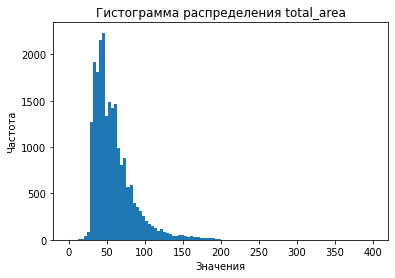

In [204]:
ax = plt.subplot()

ax.hist(df2["total_area"], bins=100, range=(0, 400))
ax.set_title("Гистограмма распределения total_area")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [205]:
df2["total_area"].describe()

count    21944.000000
mean        58.417270
std         26.140166
min         13.000000
25%         40.200000
50%         52.000000
75%         69.000000
max        199.200000
Name: total_area, dtype: float64

In [206]:
df3 = pd.DataFrame()

In [207]:
df3["total_area"] = df2["total_area"]

(0.0, 200.0)

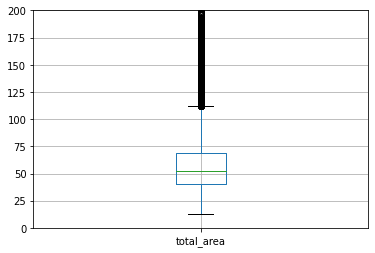

In [208]:
df3.boxplot()
plt.ylim(0, 200)

From the obtained histogram it follows that the most occurring area is a little more than 50 square meters, at the same time it can be seen from the spread diagram and statistical data that there are outliers, but they are quite rare, because from the view of the diagram we can conclude that the median value does not tend to a long tail of high values. Therefore, the mean value does not differ much from the median.

In [209]:
df3.drop(columns=["total_area"], axis=1, inplace=True)

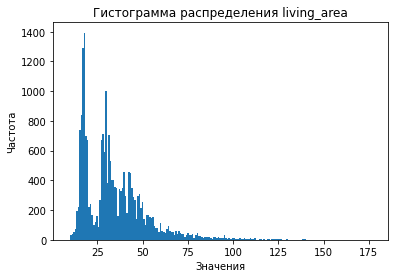

In [210]:
ax = plt.subplot()

ax.hist(df["living_area"], bins=200)
ax.set_title("Гистограмма распределения living_area")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [211]:
df["living_area"].describe()

count    21944.000000
mean        34.568656
std         18.310750
min          9.100000
25%         19.000000
50%         31.000000
75%         43.000000
max        177.288000
Name: living_area, dtype: float64

In [212]:
df3["living_area"] = df["living_area"]

<AxesSubplot:>

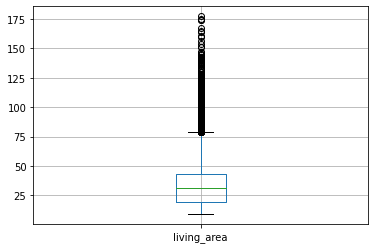

In [213]:
df3.boxplot()

It can be seen that most often apartments have a living area equal to about 30 square meters. Just as in the case of the total area, the median does not differ much from the mean value.

In [214]:
df3.drop(columns=["living_area"], axis=1, inplace=True)

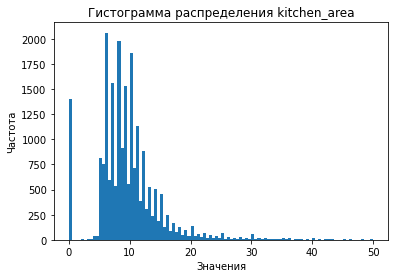

In [215]:
ax = plt.subplot()

ax.hist(df["kitchen_area"], bins=100, range=(0, 50))
ax.set_title("Гистограмма распределения kitchen_area")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [216]:
df["kitchen_area"].describe()

count    21944.000000
mean         9.650973
std          5.687973
min          0.000000
25%          6.700000
50%          9.000000
75%         11.400000
max         93.200000
Name: kitchen_area, dtype: float64

In [217]:
df3["kitchen_area"] = df["kitchen_area"]

<AxesSubplot:>

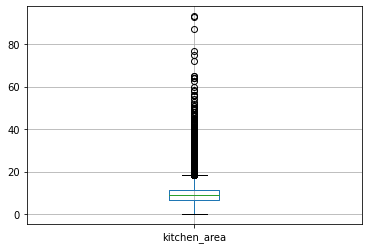

In [218]:
df3.boxplot()

The histogram shows two peaks - at zero and around 7-9 meters. As we suggested earlier, kitchens in studio apartments have zero area, and as we can see, there are quite a lot of such apartments. It is also worth noting a rather large standard deviation, which has appeared due to a fairly large number of large kitchens.

In [219]:
df3.drop(columns=["kitchen_area"], axis=1, inplace=True)

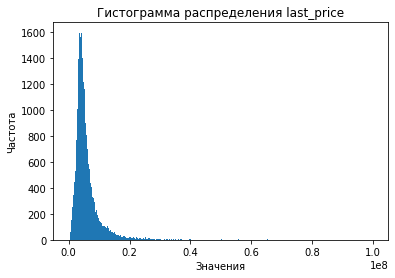

In [220]:
ax = plt.subplot()

ax.hist(df2["last_price"], bins=300, range=(0, 100000000))
ax.set_title("Гистограмма распределения last_price")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [221]:
df2["last_price"].describe()

count    2.194400e+04
mean     6.021921e+06
std      6.205056e+06
min      4.300000e+05
25%      3.450000e+06
50%      4.650000e+06
75%      6.680000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [222]:
df3["last_price"] = df2["last_price"]

In [223]:
df3.dropna(how="all", axis=1)

,last_price
0,13000000.0
1,3350000.0
2,5196000.0
3,64900000.0
4,10000000.0
...,...
23692,1350000.0
23693,4600000.0
23694,9700000.0
23695,3100000.0


(-10000000.0, 100000000.0)

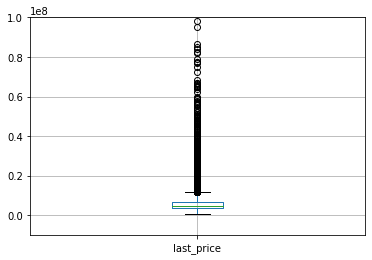

In [224]:
df3.boxplot()
plt.ylim(-10000000, 100000000)

It can be seen that there are quite a lot of outliers, the standard deviation is large, and the difference between the median and the mean is significant.

In [225]:
df3.drop(columns=["last_price"], axis=1, inplace=True)

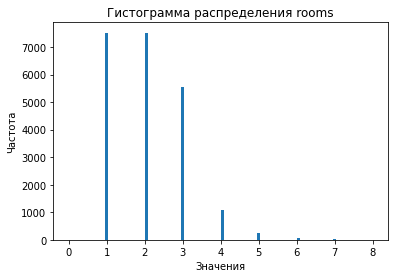

In [226]:
ax = plt.subplot()

ax.hist(df2["rooms"], bins=100, range=(0, 8))
ax.set_title("Гистограмма распределения rooms")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [227]:
df2["rooms"].describe()

count    21944.000000
mean         2.056143
std          0.976104
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

In [228]:
df3["rooms"] = df2["rooms"]

<AxesSubplot:>

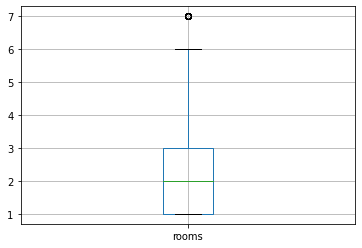

In [229]:
df3.boxplot()

It follows from the histogram that in our table there are the most one and two - room apartments. Outliers in the form of apartments with a large number of rooms are rare, so the difference between the mean and median value is small.

In [230]:
df3.drop(columns=["rooms"], axis=1, inplace=True)

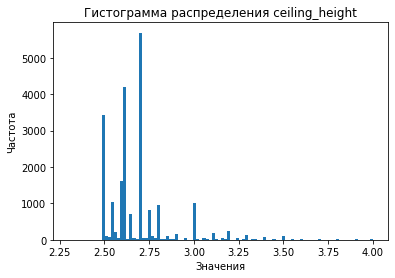

In [231]:
ax = plt.subplot()

ax.hist(df2["ceiling_height"], bins=100, range=(2.3, 4))
ax.set_title("Гистограмма распределения ceiling_height")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [232]:
df2["ceiling_height"].describe()

count    21944.000000
mean         2.691600
std          0.199761
min          2.500000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.000000
Name: ceiling_height, dtype: float64

In [233]:
df3["ceiling_height"] = df2["ceiling_height"]

<AxesSubplot:>

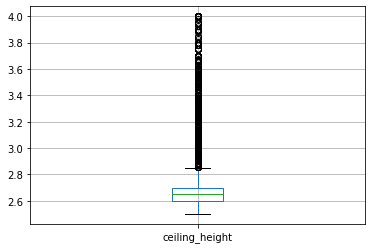

In [234]:
df3.boxplot()

It follows from the histogram and the spread diagram that the most frequent ceiling height is 2.5-2.7 meters, which corresponds to modern standards, while there are quite a few apartments with ceilings 3 meters high, which was the standard in the past. Apartments with ceilings higher than this value are rare, so the difference between the median and the average is not significant.

In [235]:
df3.drop(columns=["ceiling_height"], axis=1, inplace=True)

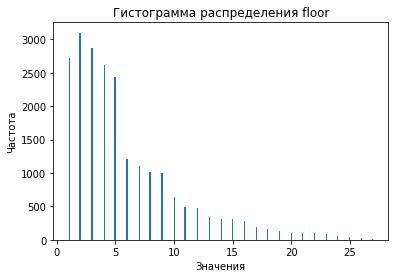

In [236]:
ax = plt.subplot()

ax.hist(df["floor"], bins=200)
ax.set_title("Гистограмма распределения floor")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [237]:
df["floor"].describe()

count    21944.000000
mean         5.843784
std          4.819697
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

In [238]:
df3["floor"] = df["floor"]

<AxesSubplot:>

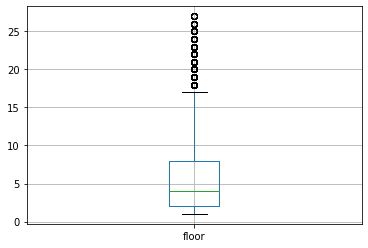

In [239]:
df3.boxplot()

According to the histogram we can conclude that the most apartments are sold on floors 1-5, and apartments on floors above 10 are very few, but it is understandable, such apartments can only be in new buildings.

In [240]:
df3.drop(columns=["floor"], axis=1, inplace=True)

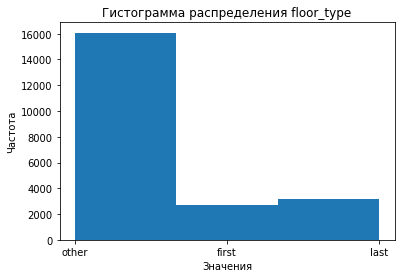

In [241]:
ax = plt.subplot()

ax.hist(df["floor_type"], bins=3)
ax.set_title("Гистограмма распределения floor_type")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

The histogram shows that the most apartments are located between the first and the last floor, which is quite logical.

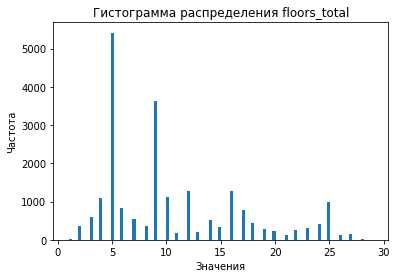

In [242]:
ax = plt.subplot()

ax.hist(df["floors_total"], bins=100)
ax.set_title("Гистограмма распределения floors_total")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [243]:
df["floors_total"].describe()

count    21944.000000
mean        10.593784
std          6.484252
min          1.000000
25%          5.000000
50%          9.000000
75%         15.000000
max         29.000000
Name: floors_total, dtype: float64

In [244]:
df3["floors_total"] = df["floors_total"]

<AxesSubplot:>

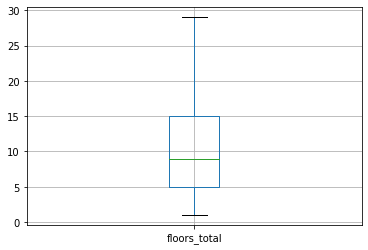

In [245]:
df3.boxplot()

We see that most of the residential buildings are 5 and 9 floors, which can be explained by the fact that they are often buildings built in the 19th-20th century, and they are the most numerous in St. Petersburg and its suburbs.

In [246]:
df3.drop(columns=["floors_total"], axis=1, inplace=True)

Explore the `cityCenters_nearest` column only for apartments in St. Petersburg, as the statistics of these apartments is important for further research.

In [247]:
df2["cityCenters_nearest"] = df.query('locality_name == "Санкт-Петербург"')[
    "cityCenters_nearest"
]

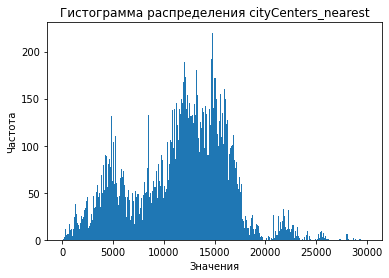

In [248]:
ax = plt.subplot()

ax.hist(df2["cityCenters_nearest"], bins=300, range=(0, 30000))
ax.set_title("Гистограмма распределения cityCenters_nearest")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [249]:
df2["cityCenters_nearest"].describe()

count    14556.000000
mean     11647.866516
std       4723.708343
min        181.000000
25%       8460.000000
50%      12307.000000
75%      14942.250000
max      29343.000000
Name: cityCenters_nearest, dtype: float64

In [250]:
df3["cityCenters_nearest"] = df2["cityCenters_nearest"]

<AxesSubplot:>

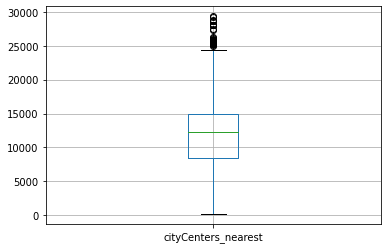

In [251]:
df3.boxplot()

Based on the histogram, we can conclude that almost all apartments are located within about 25 kilometers from the center, which seems realistic.

In [252]:
df3.drop(columns=["cityCenters_nearest"], axis=1, inplace=True)

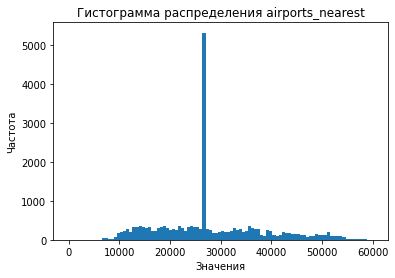

In [253]:
ax = plt.subplot()

ax.hist(df["airports_nearest"], bins=100, range=(0, 60000))
ax.set_title("Гистограмма распределения airports_nearest")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [254]:
df["airports_nearest"].describe()

count    21944.000000
mean     28361.725141
std      11180.914554
min       6450.000000
25%      20951.500000
50%      26756.500000
75%      34533.750000
max      84869.000000
Name: airports_nearest, dtype: float64

In [255]:
df3["airports_nearest"] = df["airports_nearest"]

<AxesSubplot:>

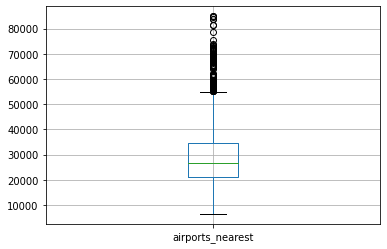

In [256]:
df3.boxplot()

The histogram shows a clear peak around 26-28 kilometers, with the median and mean in this interval, and there is a noticeable variation in distance from the nearest airport.

In [257]:
df3.drop(columns=["airports_nearest"], axis=1, inplace=True)

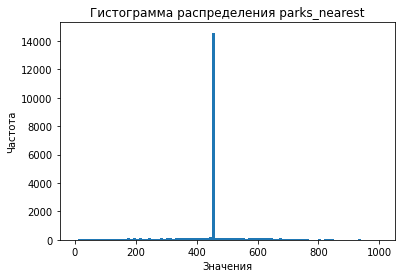

In [258]:
ax = plt.subplot()

ax.hist(df["parks_nearest"], bins=100, range=(0, 1000))
ax.set_title("Гистограмма распределения parks_nearest")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [259]:
df["parks_nearest"].describe()

count    21944.000000
mean       468.038644
std        200.751614
min          1.000000
25%        456.000000
50%        456.000000
75%        456.000000
max       3190.000000
Name: parks_nearest, dtype: float64

In [260]:
df3["parks_nearest"] = df["parks_nearest"]

<AxesSubplot:>

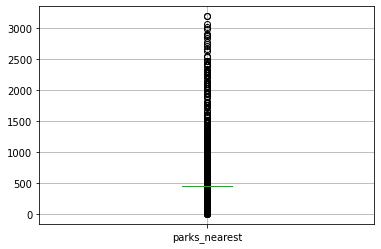

In [261]:
df3.boxplot()

The histogram shows a peak at 480 meters, which is confirmed by the statistical data and the spread diagram. At the same time, there is a large variation of values.

In [262]:
df3.drop(columns=["parks_nearest"], axis=1, inplace=True)

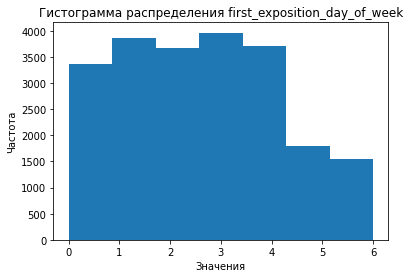

In [263]:
ax = plt.subplot()

ax.hist(df["first_exposition_day_of_week"], bins=7)
ax.set_title("Гистограмма распределения first_exposition_day_of_week")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

Most ads are published on weekdays, which is logical.

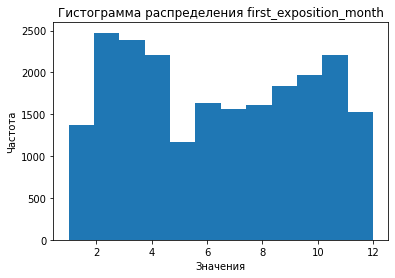

In [264]:
ax = plt.subplot()

ax.hist(df["first_exposition_month"], bins=12)
ax.set_title("Гистограмма распределения first_exposition_month")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

The histogram shows two linear trends: downward - from February to the beginning of May, upward - from the end of May to the beginning of June. Periods of decline in the number of ads at the beginning and end of the year are noticeable.

### Analyzing the speed of apartment sales

Explore the `days_exposition` column.

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21944 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  21944 non-null  float64       
 1   last_price                    21944 non-null  float64       
 2   total_area                    21944 non-null  float64       
 3   first_day_exposition          21944 non-null  datetime64[ns]
 4   rooms                         21944 non-null  float64       
 5   ceiling_height                21944 non-null  float64       
 6   floors_total                  21944 non-null  int64         
 7   living_area                   21944 non-null  float64       
 8   floor                         21944 non-null  int64         
 9   is_apartment                  21944 non-null  object        
 10  studio                        21944 non-null  object        
 11  open_plan                   

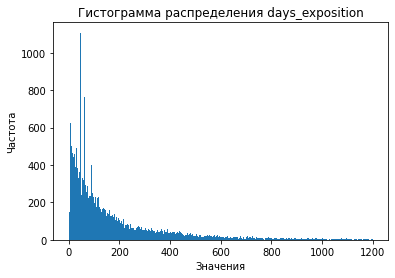

In [266]:
ax = plt.subplot()

ax.hist(df["days_exposition"], bins=300, range=(0, 1200))
ax.set_title("Гистограмма распределения days_exposition")
ax.set_xlabel("Значения")
ax.set_ylabel("Частота")

plt.show()

In [267]:
df["days_exposition"].describe()

count    19057.000000
mean       180.246419
std        218.891662
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [268]:
df3["days_exposition"] = df["days_exposition"]

<AxesSubplot:>

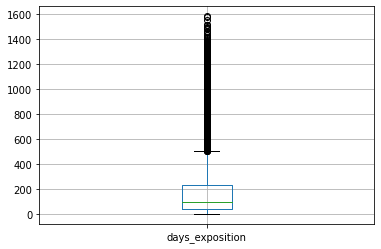

In [269]:
df3.boxplot()

From the graphs and data we can conclude that there are too fast sales (less than 3 days), when most likely the owner put up an ad for sale and then changed his mind to sell, or too long (more than a year), when the owner forgot to remove the ad after the sale. Let's remove these anomalies that cause a large difference between the mean and the median.

In [270]:
df = df.loc[
    ((df["days_exposition"] >= 3) & (df["days_exposition"] <= 365))
    | (df["days_exposition"].isna())
]

<AxesSubplot:>

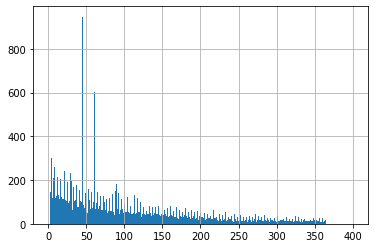

In [271]:
df["days_exposition"].hist(bins=300, range=(0, 400))

In [272]:
df["days_exposition"].describe()

count    16234.000000
mean       104.836701
std         89.326113
min          3.000000
25%         37.000000
50%         74.000000
75%        154.000000
max        364.000000
Name: days_exposition, dtype: float64

In [273]:
df3["days_exposition"] = df["days_exposition"]

<AxesSubplot:>

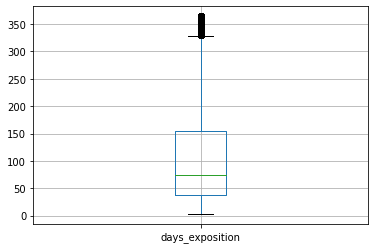

In [274]:
df3.boxplot()

After removing the anomalies, we see that the value of the mean (105 days) became closer to the value of the median (74 days).

In [275]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19121 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  19121 non-null  float64       
 1   last_price                    19121 non-null  float64       
 2   total_area                    19121 non-null  float64       
 3   first_day_exposition          19121 non-null  datetime64[ns]
 4   rooms                         19121 non-null  float64       
 5   ceiling_height                19121 non-null  float64       
 6   floors_total                  19121 non-null  int64         
 7   living_area                   19121 non-null  float64       
 8   floor                         19121 non-null  int64         
 9   is_apartment                  19121 non-null  object        
 10  studio                        19121 non-null  object        
 11  open_plan                   

### Examining the effect of various parameters on the price of an object

Find out what factors influence the price of an apartment most of all. First, we will establish the dependence of the price on the area, number of rooms, remoteness from the center.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

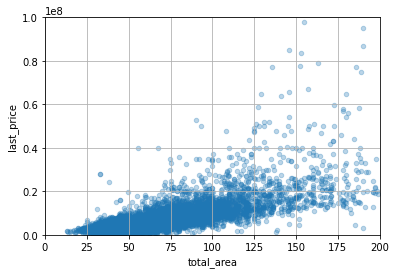

In [276]:
df.plot(
    x="total_area",
    y="last_price",
    kind="scatter",
    grid=True,
    xlim=(0, 200),
    ylim=(0, 100000000),
    alpha=0.3,
)

In [277]:
df["total_area"].corr(df["last_price"])

0.6408121559158182

The resulting scatter diagram and Pearson's correlation coefficient indicate that the relationship between price and apartment area is closer to linear than to any other.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

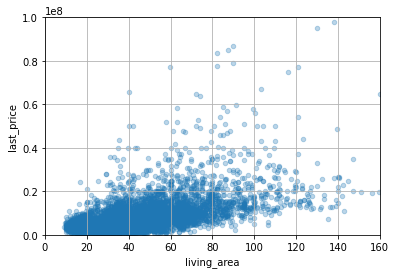

In [278]:
df.plot(
    x="living_area",
    y="last_price",
    kind="scatter",
    grid=True,
    xlim=(0, 160),
    ylim=(0, 100000000),
    alpha=0.3,
)

In [279]:
df["living_area"].corr(df["last_price"])

0.5168126334173622

The resulting scatter plot and Pearson's correlation coefficient indicate that the relationship between price and living area of the apartment is close to linear.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

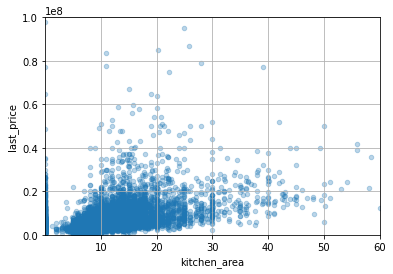

In [280]:
df.plot(
    x="kitchen_area",
    y="last_price",
    kind="scatter",
    grid=True,
    xlim=(0.001, 60),
    ylim=(0, 100000000),
    alpha=0.3,
)

In [281]:
df.query('kitchen_area > 0')["kitchen_area"].corr(df["last_price"])

0.5004227876519474

The resulting scatter plot and Pearson correlation coefficient suggest that the relationship between price and kitchen area is closer to non-linear.

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

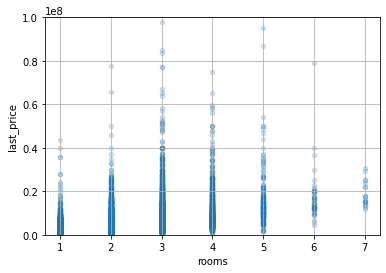

In [282]:
df.plot(
    x="rooms",
    y="last_price",
    kind="scatter",
    grid=True,
    ylim=(0, 100000000),
    alpha=0.2,
)

In [283]:
df["rooms"].corr(df["last_price"])

0.366625514919031

The correlation coefficient of the number of rooms and price is close to zero, so there is a very weak linear relationship between these parameters. This follows from the scatter diagram view.

Check the price dependence on the floor type.

In [284]:
df.groupby("floor_type")["last_price"].describe()

,count,mean,std,min,25%,50%,75%,max
floor_type,,,,,,,,
first,2311.0,4.636395e+06,4.518552e+06,430000.0,2797000.0,3900000.0,5300000.0,135000000.0
last,2707.0,5.664408e+06,7.667486e+06,430000.0,2980000.0,4250000.0,6292500.0,289238400.0
other,14103.0,6.155789e+06,5.979731e+06,450000.0,3600000.0,4800000.0,6800000.0,330000000.0


In [285]:
df1 = df.groupby("floor_type")["last_price"].mean().to_frame()

In [286]:
df1["last_price"]

floor_type
first    4.636395e+06
last     5.664408e+06
other    6.155789e+06
Name: last_price, dtype: float64

<AxesSubplot:xlabel='floor_type'>

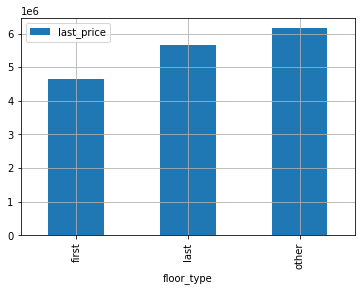

In [287]:
df1.plot(kind="bar", grid=True)

From the charts and statistical data we can conclude that the type of floor affects the price. The highest mean and median value are apartments on the floors from the second to the last, the lowest - apartments on the first floor, while the highest standard deviation is observed for apartments located on the last floor.

Check the dependence of price on the posting date: day of the week, month and year.

In [288]:
df.groupby("first_exposition_day_of_week")["last_price"].describe()

,count,mean,std,min,25%,50%,75%,max
first_exposition_day_of_week,,,,,,,,
0,2920.0,5.929406e+06,5.056250e+06,430000.0,3496000.0,4600000.0,6500000.0,65000000.0
1,3360.0,5.930955e+06,7.125032e+06,430000.0,3450000.0,4650000.0,6500000.0,289238400.0
2,3161.0,5.894703e+06,7.333609e+06,450000.0,3450000.0,4600000.0,6590000.0,330000000.0
3,3420.0,6.068657e+06,6.277693e+06,450000.0,3450000.0,4600000.0,6600000.0,135000000.0
4,3279.0,5.818067e+06,4.975613e+06,450000.0,3475000.0,4550000.0,6590000.0,83820000.0
5,1600.0,5.817843e+06,5.629298e+06,550000.0,3400000.0,4550000.0,6500000.0,98000000.0
6,1381.0,5.682495e+06,4.919358e+06,470000.0,3400000.0,4500000.0,6222000.0,95000000.0


In [289]:
df1 = df.groupby("first_exposition_day_of_week")["last_price"].mean().to_frame()

In [290]:
df1

,last_price
first_exposition_day_of_week,
0,5.929406e+06
1,5.930955e+06
2,5.894703e+06
3,6.068657e+06
4,5.818067e+06
5,5.817843e+06
6,5.682495e+06


<AxesSubplot:xlabel='first_exposition_day_of_week'>

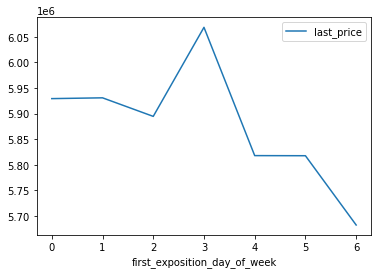

In [291]:
df1.plot()

From the plotted graph it follows that the highest value is on Thursday and the lowest value is on Sunday, but in general we can say that the price of the apartment does not depend on the day of the week of publication, as the difference in price on different days of the week is not significant.

In [292]:
df.groupby("first_exposition_month")["last_price"].describe()

,count,mean,std,min,25%,50%,75%,max
first_exposition_month,,,,,,,,
1,1189.0,5.734189e+06,4.775469e+06,600000.0,3390000.0,4500000.0,6450000.0,59000000.0
2,2219.0,5.999972e+06,6.133173e+06,450000.0,3355000.0,4600000.0,6500000.0,135000000.0
3,2080.0,5.975346e+06,7.834724e+06,550000.0,3457500.0,4650000.0,6500000.0,289238400.0
4,1955.0,6.037951e+06,8.973479e+06,430000.0,3500000.0,4750000.0,6600000.0,330000000.0
5,950.0,5.792227e+06,4.499427e+06,600000.0,3500000.0,4500000.0,6584065.0,40000000.0
6,1376.0,5.700009e+06,5.215580e+06,430000.0,3250000.0,4325000.0,6357250.0,57906000.0
7,1351.0,5.875685e+06,4.985679e+06,440000.0,3490000.0,4600000.0,6700000.0,65850000.0
8,1428.0,6.100095e+06,5.651395e+06,450000.0,3490000.0,4600000.0,6650000.0,85000000.0
9,1628.0,5.943788e+06,5.461674e+06,520000.0,3500000.0,4600000.0,6612500.0,86738800.0


In [293]:
df1 = df.groupby("first_exposition_month")["last_price"].mean().to_frame()

In [294]:
df1

,last_price
first_exposition_month,
1,5.734189e+06
2,5.999972e+06
3,5.975346e+06
4,6.037951e+06
5,5.792227e+06
6,5.700009e+06
7,5.875685e+06
8,6.100095e+06
9,5.943788e+06


<AxesSubplot:xlabel='first_exposition_month'>

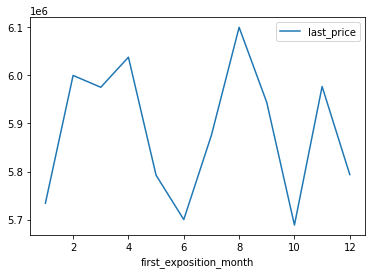

In [295]:
df1.plot()

Similar to the dependence of the price on the day of the week of publication of the ad from the data obtained we can conclude that the price does not depend on the month of publication.

In [296]:
df.groupby("first_exposition_year")["last_price"].describe()

,count,mean,std,min,25%,50%,75%,max
first_exposition_year,,,,,,,,
2014,18.0,1.691522e+07,1.097692e+07,2300000.0,8200000.0,17525000.0,23625000.0,45900000.0
2015,277.0,7.668950e+06,8.496632e+06,1200000.0,3700000.0,5144000.0,7585000.0,86738800.0
2016,1652.0,6.043437e+06,5.696244e+06,600000.0,3400000.0,4500000.0,6583855.0,65000000.0
2017,6790.0,5.822554e+06,5.588784e+06,450000.0,3399000.0,4490000.0,6450000.0,124000000.0
2018,7785.0,5.674648e+06,5.667091e+06,430000.0,3400000.0,4590000.0,6450000.0,330000000.0
2019,2599.0,6.440379e+06,8.169592e+06,430000.0,3750000.0,5020000.0,7000000.0,289238400.0


In [297]:
df1 = df.groupby("first_exposition_year")["last_price"].mean().to_frame()

In [298]:
df1

,last_price
first_exposition_year,
2014,1.691522e+07
2015,7.668950e+06
2016,6.043437e+06
2017,5.822554e+06
2018,5.674648e+06
2019,6.440379e+06


<AxesSubplot:xlabel='first_exposition_year'>

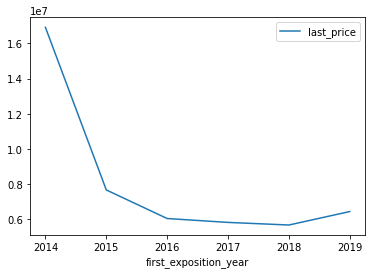

In [299]:
df1.plot()

From the resulting graph, we can conclude that apartments were noticeably more expensive in 2014, and from 2015 to 2019 there were slight fluctuations in price.

In conclusion, we can state that the price of an apartment depends on its area, the floor on which it is located, and the year of listing.

### Analyzing apartment prices in the 10 most popular settlements

Find 10 settlements with the largest number of advertisements and among them we will distinguish the settlements with the highest and lowest cost of housing.

In [300]:
df.reset_index(drop=True, inplace=True)

In [301]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km,price_per_area,first_exposition_month,first_exposition_year,first_exposition_day_of_week,floor_type
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,16,120370.370370,3,2019,3,other
1,7.0,3350000.0,40.4,2018-12-04,1.0,2.70,11,18.6,1,False,...,456.0,0.0,504.0,81.0,0,82920.792079,12,2018,1,first
2,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,8,100000.000000,6,2018,1,other
3,10.0,2890000.0,30.4,2018-09-10,1.0,2.70,12,14.4,5,False,...,456.0,1.0,504.0,55.0,0,95065.789474,9,2018,0,other
4,6.0,3700000.0,37.3,2017-11-02,1.0,2.70,26,10.6,6,False,...,456.0,0.0,504.0,155.0,0,99195.710456,11,2017,3,other


In [302]:
df.groupby("locality_name")["locality_name"].agg(["count"]).sort_values(
    "count", ascending=False
).head(10)

,count
locality_name,
Санкт-Петербург,12647
посёлок Мурино,423
посёлок Шушары,377
Всеволожск,331
Пушкин,310
Колпино,298
посёлок Парголово,273
Гатчина,255
деревня Кудрово,222


In [303]:
df3 = (
    df.groupby("locality_name")["locality_name"]
    .agg(["count"])
    .sort_values("count", ascending=False)
)

In [304]:
list_of_cities = df3.index[0:10]

In [305]:
list_of_cities

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'посёлок Парголово', 'Гатчина', 'деревня Кудрово',
       'Выборг'],
      dtype='object', name='locality_name')

In [306]:
df4 = df.query("locality_name in @list_of_cities")

In [307]:
df5 = df4.pivot_table(
    index="locality_name", values="price_per_area", aggfunc="mean"
).sort_values("price_per_area", ascending=False)

In [308]:
round(df5, 2)

,price_per_area
locality_name,
Санкт-Петербург,112608.68
Пушкин,102622.03
деревня Кудрово,92368.02
посёлок Парголово,90315.87
посёлок Мурино,85220.75
посёлок Шушары,78680.80
Колпино,75070.93
Всеволожск,69265.55
Гатчина,69010.55


<AxesSubplot:xlabel='locality_name'>

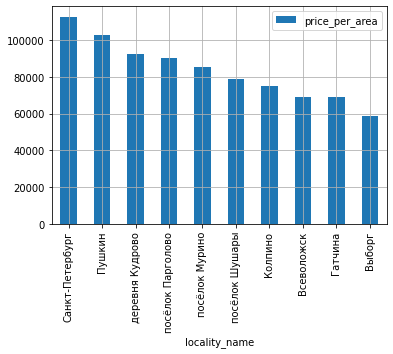

In [309]:
df5.plot(kind="bar", grid=True)

Of the top 10 most popular settlements, apartments in St. Petersburg have the highest price, the lowest - in Vyborg.

### Checking the dependence of the object price on the distance to the city center

Put the apartments in St. Petersburg in a separate dataframe.

In [310]:
df_spb = df.query('locality_name=="Санкт-Петербург"')

In [311]:
df_spb.reset_index(drop=True, inplace=True)

In [312]:
df_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_distance_km,price_per_area,first_exposition_month,first_exposition_year,first_exposition_day_of_week,floor_type
0,20.0,13000000.0,108.0,2019-03-07,3.0,2.70,16,51.0,8,False,...,482.0,2.0,755.0,NaN,16,120370.370370,3,2019,3,other
1,2.0,10000000.0,100.0,2018-06-19,2.0,3.03,14,32.0,13,False,...,112.0,1.0,48.0,121.0,8,100000.000000,6,2018,1,other
2,18.0,5400000.0,61.0,2017-02-26,3.0,2.50,9,43.6,7,False,...,456.0,0.0,504.0,289.0,15,88524.590164,2,2017,6,other
3,5.0,5050000.0,39.6,2017-11-16,1.0,2.67,12,20.3,3,False,...,310.0,2.0,553.0,137.0,14,127525.252525,11,2017,3,other
4,16.0,4650000.0,39.0,2017-11-18,1.0,2.61,14,20.5,5,False,...,590.0,1.0,296.0,19.0,14,119230.769231,11,2017,5,other


In [313]:
df_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12647 entries, 0 to 12646
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   total_images                  12647 non-null  float64       
 1   last_price                    12647 non-null  float64       
 2   total_area                    12647 non-null  float64       
 3   first_day_exposition          12647 non-null  datetime64[ns]
 4   rooms                         12647 non-null  float64       
 5   ceiling_height                12647 non-null  float64       
 6   floors_total                  12647 non-null  int64         
 7   living_area                   12647 non-null  float64       
 8   floor                         12647 non-null  int64         
 9   is_apartment                  12647 non-null  object        
 10  studio                        12647 non-null  object        
 11  open_plan                   

In [314]:
df_spb["center_distance_km"]

0        16
1         8
2        15
3        14
4        14
         ..
12642    17
12643    14
12644    16
12645     6
12646     4
Name: center_distance_km, Length: 12647, dtype: int64

In [315]:
df_spb.sort_values("center_distance_km")[["cityCenters_nearest", "center_distance_km"]]

,cityCenters_nearest,center_distance_km
7363,423.0,0
1000,287.0,0
4618,376.0,0
4584,215.0,0
4109,318.0,0
...,...,...
12245,28018.0,28
5112,28018.0,28
5779,28644.0,29
6962,29343.0,29


Calculate the average price for each kilometer.

In [316]:
df_1 = df_spb.pivot_table(
    index="center_distance_km", values="price_per_area", aggfunc="mean"
)

In [317]:
data_subcategory = df_spb.merge(df_1, on="center_distance_km", how="left")

In [318]:
df_spb.pivot_table(index="center_distance_km", values="price_per_area", aggfunc="mean")

,price_per_area
center_distance_km,
0,213836.359431
1,179652.729132
2,150279.141251
3,120516.087129
4,127610.369194
5,137294.101635
6,145952.006749
7,149893.193166
8,122953.975206


In [319]:
data_subcategory.sort_values("center_distance_km")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,center_distance_km,price_per_area_x,first_exposition_month,first_exposition_year,first_exposition_day_of_week,floor_type,price_per_area_y
7363,5.0,30600000.0,162.0,2018-07-09,7.0,3.00,5,100.9,3,False,...,2.0,516.0,NaN,0,188888.888889,7,2018,0,other,213836.359431
1000,18.0,9590000.0,108.0,2017-05-23,2.0,3.30,5,59.0,2,False,...,3.0,290.0,69.0,0,88796.296296,5,2017,1,other,213836.359431
4618,15.0,13500000.0,98.0,2017-12-19,3.0,3.50,5,46.0,3,False,...,3.0,222.0,35.0,0,137755.102041,12,2017,1,other,213836.359431
4584,7.0,10990000.0,100.0,2015-12-16,3.0,3.90,5,37.8,3,False,...,2.0,511.0,265.0,0,109900.000000,12,2015,2,other,213836.359431
4109,20.0,50000000.0,93.0,2019-04-18,2.0,2.70,7,40.0,4,False,...,3.0,569.0,NaN,0,537634.408602,4,2019,3,other,213836.359431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0.0,5144000.0,64.0,2015-10-14,2.0,2.61,5,33.0,5,False,...,0.0,504.0,285.0,28,80375.000000,10,2015,2,last,81161.915320
5112,0.0,3413000.0,43.0,2015-11-10,1.0,2.61,5,18.0,1,False,...,0.0,504.0,258.0,28,79372.093023,11,2015,1,first,81161.915320
5779,10.0,4850000.0,62.0,2017-05-16,3.0,2.61,5,35.7,1,False,...,0.0,504.0,63.0,29,78225.806452,5,2017,1,first,69565.424983
6962,16.0,4200000.0,56.8,2018-07-04,2.0,3.50,3,27.9,1,False,...,0.0,504.0,187.0,29,73943.661972,7,2018,2,first,69565.424983


In [320]:
data_subcategory.rename(
    columns={"price_per_area_y": "avg_price_per_area"}, inplace=True
)

In [321]:
data_subcategory.sort_values("center_distance_km")

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,center_distance_km,price_per_area_x,first_exposition_month,first_exposition_year,first_exposition_day_of_week,floor_type,avg_price_per_area
7363,5.0,30600000.0,162.0,2018-07-09,7.0,3.00,5,100.9,3,False,...,2.0,516.0,NaN,0,188888.888889,7,2018,0,other,213836.359431
1000,18.0,9590000.0,108.0,2017-05-23,2.0,3.30,5,59.0,2,False,...,3.0,290.0,69.0,0,88796.296296,5,2017,1,other,213836.359431
4618,15.0,13500000.0,98.0,2017-12-19,3.0,3.50,5,46.0,3,False,...,3.0,222.0,35.0,0,137755.102041,12,2017,1,other,213836.359431
4584,7.0,10990000.0,100.0,2015-12-16,3.0,3.90,5,37.8,3,False,...,2.0,511.0,265.0,0,109900.000000,12,2015,2,other,213836.359431
4109,20.0,50000000.0,93.0,2019-04-18,2.0,2.70,7,40.0,4,False,...,3.0,569.0,NaN,0,537634.408602,4,2019,3,other,213836.359431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0.0,5144000.0,64.0,2015-10-14,2.0,2.61,5,33.0,5,False,...,0.0,504.0,285.0,28,80375.000000,10,2015,2,last,81161.915320
5112,0.0,3413000.0,43.0,2015-11-10,1.0,2.61,5,18.0,1,False,...,0.0,504.0,258.0,28,79372.093023,11,2015,1,first,81161.915320
5779,10.0,4850000.0,62.0,2017-05-16,3.0,2.61,5,35.7,1,False,...,0.0,504.0,63.0,29,78225.806452,5,2017,1,first,69565.424983
6962,16.0,4200000.0,56.8,2018-07-04,2.0,3.50,3,27.9,1,False,...,0.0,504.0,187.0,29,73943.661972,7,2018,2,first,69565.424983


In [322]:
df_1 = df_spb.pivot_table(
    index="center_distance_km", values="last_price", aggfunc="mean"
)

In [323]:
data_subcategory_1 = data_subcategory.merge(df_1, on="center_distance_km", how="left")

In [324]:
data_subcategory_1.sort_values("center_distance_km")

,total_images,last_price_x,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,center_distance_km,price_per_area_x,first_exposition_month,first_exposition_year,first_exposition_day_of_week,floor_type,avg_price_per_area,last_price_y
7363,5.0,30600000.0,162.0,2018-07-09,7.0,3.00,5,100.9,3,False,...,516.0,NaN,0,188888.888889,7,2018,0,other,213836.359431,2.317490e+07
1000,18.0,9590000.0,108.0,2017-05-23,2.0,3.30,5,59.0,2,False,...,290.0,69.0,0,88796.296296,5,2017,1,other,213836.359431,2.317490e+07
4618,15.0,13500000.0,98.0,2017-12-19,3.0,3.50,5,46.0,3,False,...,222.0,35.0,0,137755.102041,12,2017,1,other,213836.359431,2.317490e+07
4584,7.0,10990000.0,100.0,2015-12-16,3.0,3.90,5,37.8,3,False,...,511.0,265.0,0,109900.000000,12,2015,2,other,213836.359431,2.317490e+07
4109,20.0,50000000.0,93.0,2019-04-18,2.0,2.70,7,40.0,4,False,...,569.0,NaN,0,537634.408602,4,2019,3,other,213836.359431,2.317490e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0.0,5144000.0,64.0,2015-10-14,2.0,2.61,5,33.0,5,False,...,504.0,285.0,28,80375.000000,10,2015,2,last,81161.915320,5.026429e+06
5112,0.0,3413000.0,43.0,2015-11-10,1.0,2.61,5,18.0,1,False,...,504.0,258.0,28,79372.093023,11,2015,1,first,81161.915320,5.026429e+06
5779,10.0,4850000.0,62.0,2017-05-16,3.0,2.61,5,35.7,1,False,...,504.0,63.0,29,78225.806452,5,2017,1,first,69565.424983,4.633333e+06
6962,16.0,4200000.0,56.8,2018-07-04,2.0,3.50,3,27.9,1,False,...,504.0,187.0,29,73943.661972,7,2018,2,first,69565.424983,4.633333e+06


In [325]:
df_spb.pivot_table(index="center_distance_km", values="last_price", aggfunc="mean")

,last_price
center_distance_km,
0,2.317490e+07
1,1.854708e+07
2,1.384299e+07
3,1.007180e+07
4,1.043359e+07
5,1.142944e+07
6,1.209170e+07
7,1.253984e+07
8,8.865381e+06


In [326]:
data_subcategory_1.rename(columns={"last_price_y": "avg_last_price"}, inplace=True)

In [327]:
data_subcategory_1.sort_values("center_distance_km")

,total_images,last_price_x,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,center_distance_km,price_per_area_x,first_exposition_month,first_exposition_year,first_exposition_day_of_week,floor_type,avg_price_per_area,avg_last_price
7363,5.0,30600000.0,162.0,2018-07-09,7.0,3.00,5,100.9,3,False,...,516.0,NaN,0,188888.888889,7,2018,0,other,213836.359431,2.317490e+07
1000,18.0,9590000.0,108.0,2017-05-23,2.0,3.30,5,59.0,2,False,...,290.0,69.0,0,88796.296296,5,2017,1,other,213836.359431,2.317490e+07
4618,15.0,13500000.0,98.0,2017-12-19,3.0,3.50,5,46.0,3,False,...,222.0,35.0,0,137755.102041,12,2017,1,other,213836.359431,2.317490e+07
4584,7.0,10990000.0,100.0,2015-12-16,3.0,3.90,5,37.8,3,False,...,511.0,265.0,0,109900.000000,12,2015,2,other,213836.359431,2.317490e+07
4109,20.0,50000000.0,93.0,2019-04-18,2.0,2.70,7,40.0,4,False,...,569.0,NaN,0,537634.408602,4,2019,3,other,213836.359431,2.317490e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12245,0.0,5144000.0,64.0,2015-10-14,2.0,2.61,5,33.0,5,False,...,504.0,285.0,28,80375.000000,10,2015,2,last,81161.915320,5.026429e+06
5112,0.0,3413000.0,43.0,2015-11-10,1.0,2.61,5,18.0,1,False,...,504.0,258.0,28,79372.093023,11,2015,1,first,81161.915320,5.026429e+06
5779,10.0,4850000.0,62.0,2017-05-16,3.0,2.61,5,35.7,1,False,...,504.0,63.0,29,78225.806452,5,2017,1,first,69565.424983,4.633333e+06
6962,16.0,4200000.0,56.8,2018-07-04,2.0,3.50,3,27.9,1,False,...,504.0,187.0,29,73943.661972,7,2018,2,first,69565.424983,4.633333e+06


Plot the dependence of `avg_price_per_area` and `avg_last_price` on `center_distance_km`.

<AxesSubplot:xlabel='center_distance_km'>

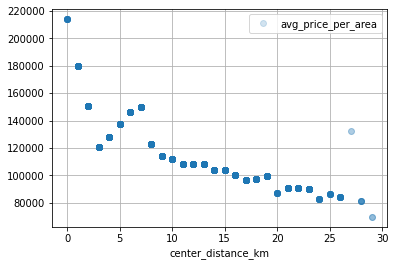

In [328]:
data_subcategory_1.plot(
    x="center_distance_km", y="avg_price_per_area", style="o", grid=True, alpha=0.2,
)

<AxesSubplot:xlabel='center_distance_km'>

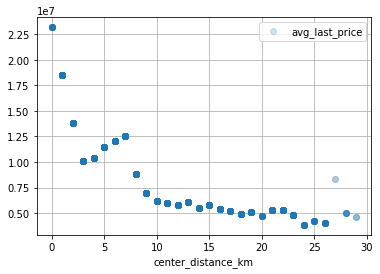

In [329]:
data_subcategory_1.plot(
    x="center_distance_km", y="avg_last_price", style="o", grid=True, alpha=0.2,
)

From the obtained graphs we can see that the closer to the center, the more expensive apartments and the greater the spread in the cost of apartments, with distance from the center the cost of apartments decreases and most of the apartments are in the same price category.

## Overall conclusion

At the beginning of this project, the data were preprocessed, resulting in:
1. Missing values in the columns `ceiling_height`, `floors_total`, `living_area`, `is_apartment`, `kitchen_area`, `balcony`, `locality_name`, `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` and `days_exposition` were found and processed.
2. Anomalies were processed - zero values in `rooms` column, `airports_nearest` column, incorrect values in `ceiling_heights` column, too fast and too long sales in `days_exposition` column, rare apartments with more rooms (more than 7), apartments in buildings with more than 30 floors, lines with area more than 200 and less than 9 square meters, abnormally small values in `last_price` were removed.
3. Implicit duplicates in the `locality_name` column were removed.

Next, the following parameters were added:
1. Price of one square meter;
2. Day of the week of announcement publication (0 - Monday, 1 - Tuesday and so on);
3. Month of announcement publication;
4. Year of publication of the ad;
5. Type of apartment floor (values - "first", "last", "other");
6. Distance to the city center in kilometers (convert from m to km and round up to whole values).

Subsequently, the following characteristics were analyzed:
- Living area;
- Kitchen area;
- Price of the property;
- Number of rooms;
- Ceiling height;
- Floor of the apartment;
- Type of apartment floor ("first", "last", "other");
- Total number of floors in the building;
- Distance to the city center in meters;
- Distance to the nearest airport;
- Distance to the nearest park;
- Day and month of the advertisement publication.

From the results we can see that the most common total area is 50 square meters, the most common apartments have one or two rooms, the most common ceiling height is 2.5-2.7 meters and the most common apartments are sold on the 1-5 floors.

At the end of the work the dependence of the cost of an apartment in St. Petersburg and neighboring settlements on the following parameters was obtained:
1. Area,
2. Floor,
3. The year of the advertisement publication.

The average price of an apartment for each kilometer was calculated and it was found that it decreases with distance from the center, with a much larger price spread for apartments in the center than for apartments in more remote areas.

In the future, it is possible to conduct a research of the dependence on different parameters of prices for apartments located in the same neighborhood (not only central).